In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('wine-clustering-extended.csv')

In [5]:
data.size

13000

In [6]:
data.shape

(1000, 13)

In [7]:
data.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               1000 non-null   float64
 1   Malic_Acid            1000 non-null   float64
 2   Ash                   1000 non-null   float64
 3   Ash_Alcanity          1000 non-null   float64
 4   Magnesium             1000 non-null   int64  
 5   Total_Phenols         1000 non-null   float64
 6   Flavanoids            1000 non-null   float64
 7   Nonflavanoid_Phenols  1000 non-null   float64
 8   Proanthocyanins       1000 non-null   float64
 9   Color_Intensity       1000 non-null   float64
 10  Hue                   1000 non-null   float64
 11  OD280                 1000 non-null   float64
 12  Proline               1000 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 101.7 KB


In [9]:
data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,12.986070,2.332950,2.36714,19.486400,99.778000,2.295270,2.01420,0.365250,1.566180,5.061550,0.952144,2.588200,747.890000
std,0.804079,1.114909,0.27196,3.335155,14.494026,0.629822,0.99935,0.123841,0.576484,2.332019,0.229854,0.712944,313.940616
min,11.030000,0.740000,1.36000,10.600000,70.000000,0.980000,0.34000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.360000,1.600000,2.20750,17.200000,88.000000,1.750000,1.17500,0.270000,1.220000,3.210000,0.777500,1.920000,500.000000
50%,13.040000,1.865000,2.36000,19.500000,98.000000,2.320000,2.13000,0.340000,1.480000,4.700000,0.970000,2.780000,660.000000
75%,13.670000,3.030000,2.55250,21.500000,107.000000,2.800000,2.79000,0.450000,1.950000,6.200000,1.120000,3.160000,990.000000
max,14.830000,5.800000,3.23000,30.000000,162.000000,3.880000,5.08000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [10]:
data.dtypes

Alcohol                 float64
Malic_Acid              float64
Ash                     float64
Ash_Alcanity            float64
Magnesium                 int64
Total_Phenols           float64
Flavanoids              float64
Nonflavanoid_Phenols    float64
Proanthocyanins         float64
Color_Intensity         float64
Hue                     float64
OD280                   float64
Proline                   int64
dtype: object

In [11]:
data.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [12]:
data.duplicated().sum()

np.int64(822)

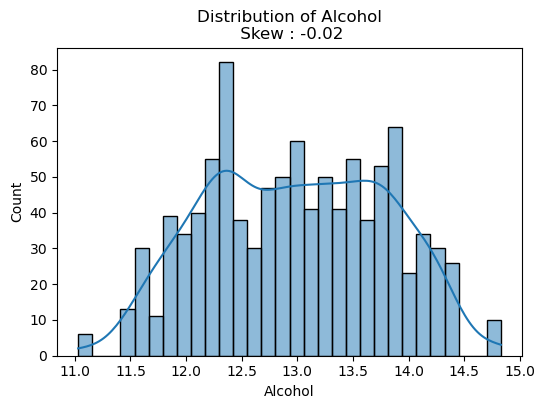

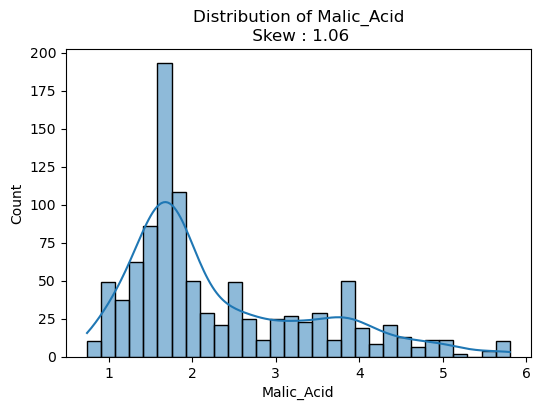

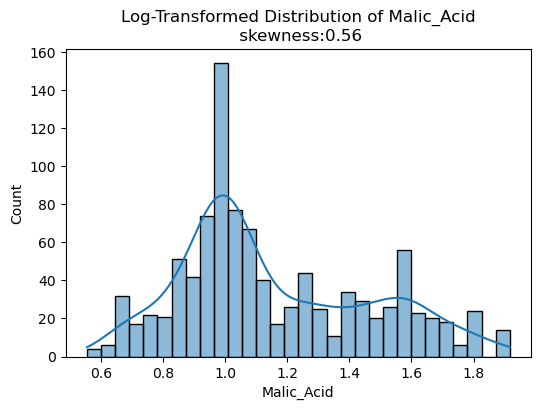

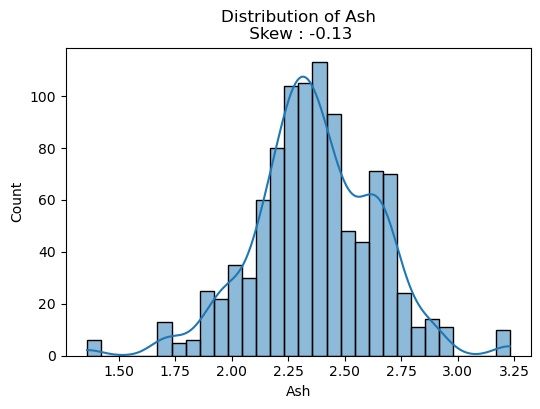

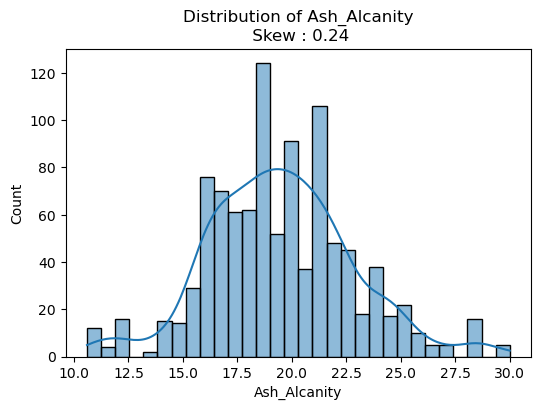

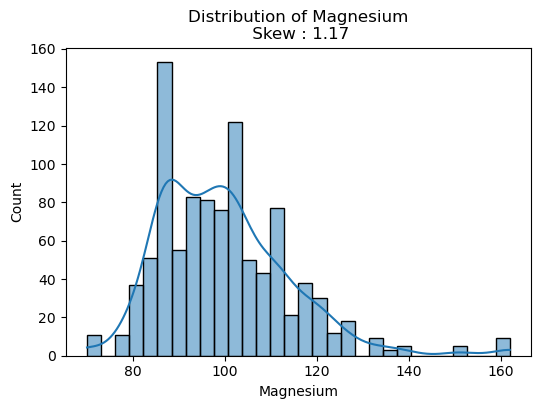

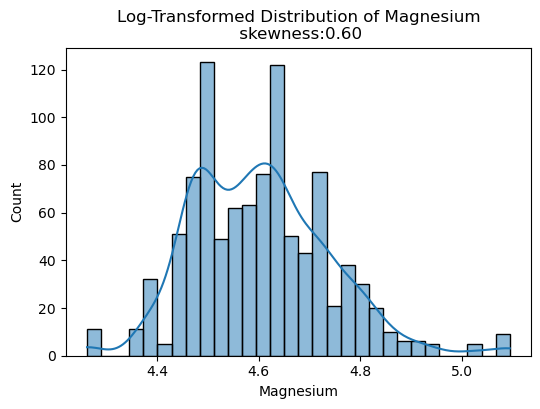

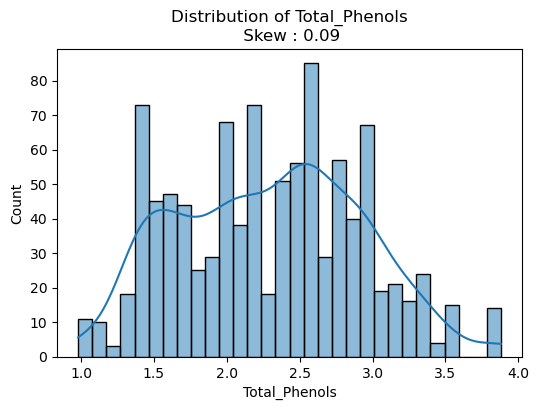

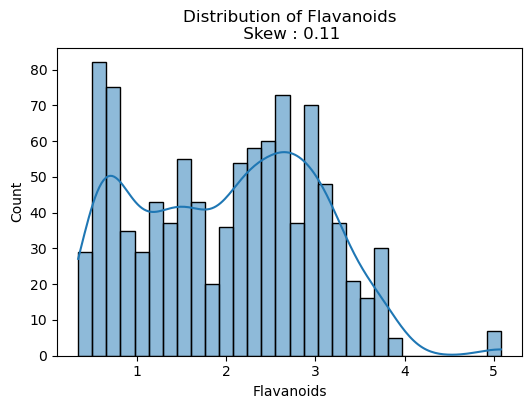

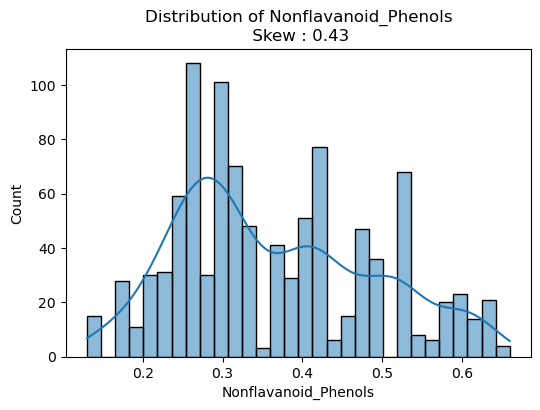

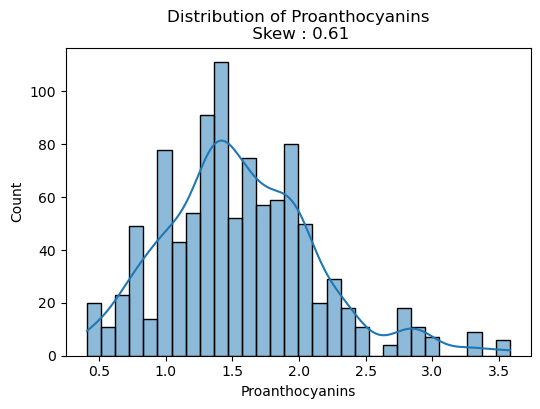

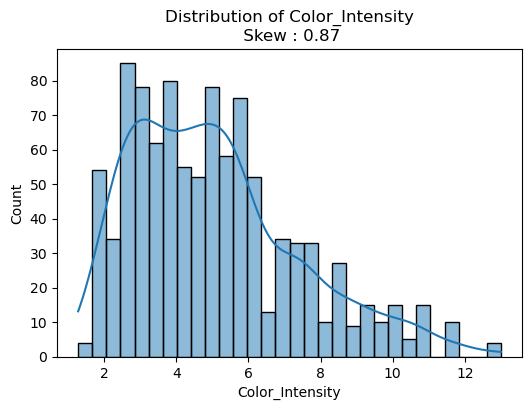

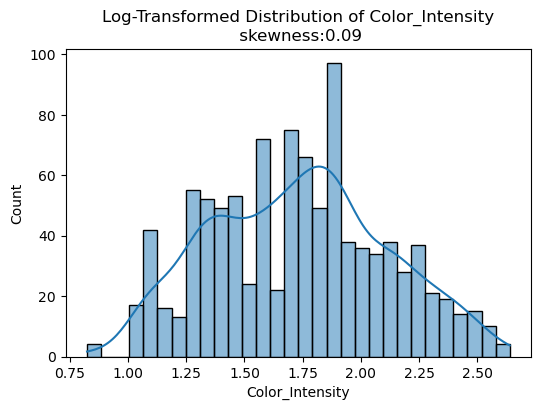

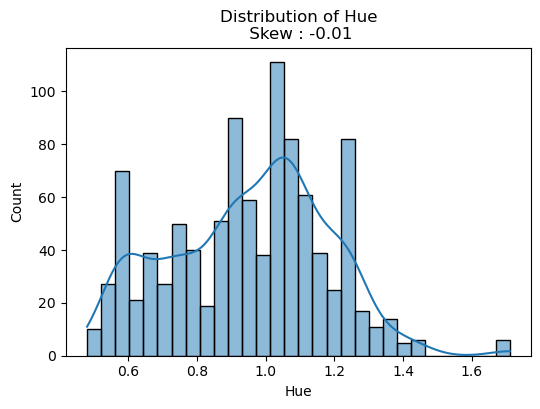

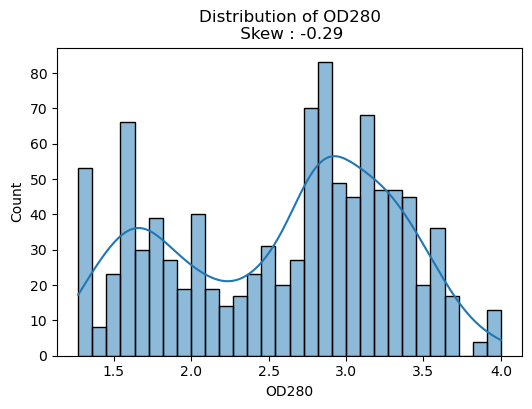

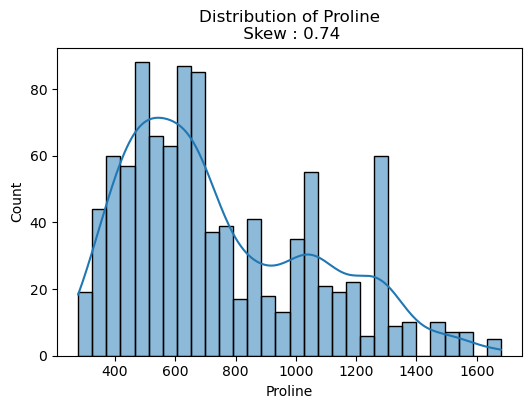

In [13]:
for col in data:
    plt.figure(figsize=(6,4))
    sns.histplot(data[col],kde = True, bins = 30)
    skewness = data[col].skew()
    plt.title(f"Distribution of {col}\n Skew : {skewness:.2f}")
    plt.show()
    if abs(skewness) > 0.80:
        plt.figure(figsize=(6,4))
        sns.histplot(np.log1p(data[col]), kde=True, bins=30)
        skewness1 = np.log1p(data[col]).skew()
        plt.title(f"Log-Transformed Distribution of {col}\n skewness:{skewness1:.2f}")
        plt.show()

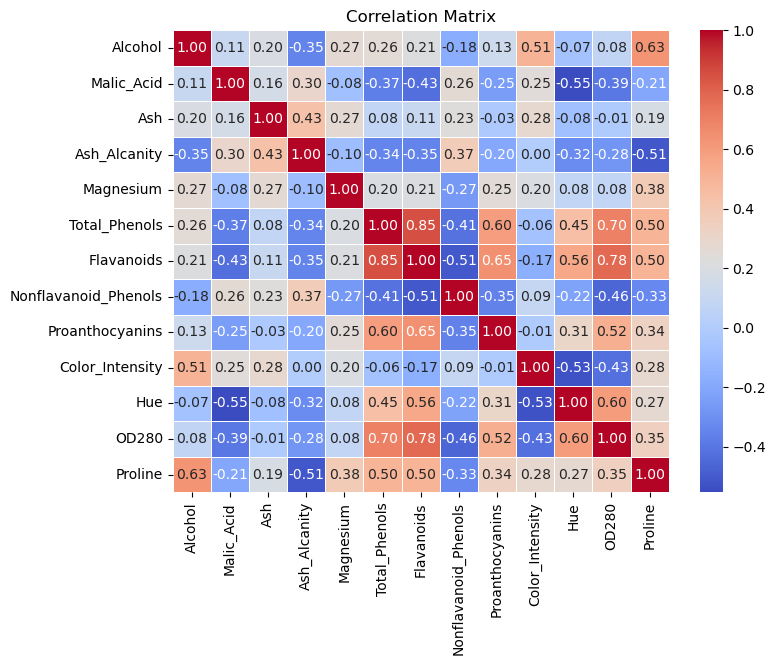

In [14]:
corr = data.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

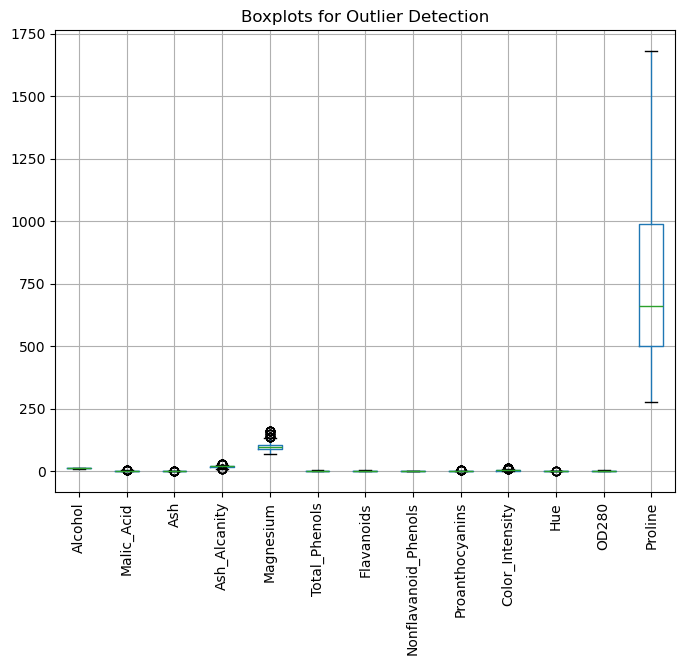

In [15]:
plt.figure(figsize=(8,6))
data.boxplot(rot=90)
plt.title("Boxplots for Outlier Detection")
plt.show()


In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(data)


In [17]:
data.to_csv("data.csv", index=False)